<a href="https://colab.research.google.com/github/chloejiwon/deeplearning_basics-pytorch/blob/master/Doit_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net 만드는 단계

1. Dataset 정의
 * x 와 target 정의 (regression인지 classfication인지)
 * train / evaluate / test Dataset 나누기
1. Activation 함수 정의
1. Loss 함수(=cost, object function) 정의
 * NN의 방법에 따라 logistic regression = Corss Entropy
 * Regression = RMSE 
1. Optimization 함수 정의
1. Hyperparameter 정의

#03-1. Regression

In [21]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [24]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [27]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [26]:
diabetes.target[:3]

array([151.,  75., 141.])

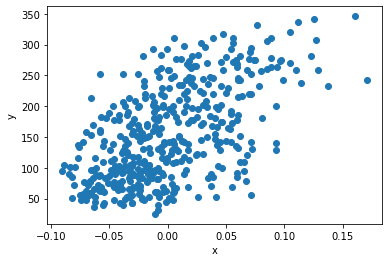

In [28]:
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
# 훈련 데이터 준비하기
x = diabetes.data[:, 2]
y = diabetes.target

## 훈련데이터에 잘 맞는 w와 b를 찾는 방법 (=> 올바른 모델 찾기)

1. 무작위로 w와 b를 정한다. (무작위로 모델 만들기)
1. x에서 샘플 하나를 선택해서 y_Hat을 계산한다. (무작위로 모델 예측하기)
1. y_hat과 선택한 샘플의 진짜 y를 비교한다. (예측값 - 정답 비교)
1. y_hat과 y가 가까워지도록 w, b를 조정한다. (모델 조정하기)
1. 모든 샘플을 처리할 때 까지 2~4를 반복

In [30]:
# 1. w와 b를 초기화하기
w = 1.0
b = 1.0

In [31]:
# 2. 훈련데이터의 첫번째 샘플 데이터로 y_hat 게산하기
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


In [32]:
# 3. target과 비교하기
print(y[0])

151.0


In [33]:
# 4. y_hat과 y가 가까워지도록 w 값 조정하기 
# 151.0과 1.06..은 차이가 많이 크다. 그래서 조정을 해야하는데... 어떤 방향으로 바꿔야 가까워지는 방향으로 갈까? -> w와 b를 조금씩 변경해서 y_hat 증가하는지 감소하는지 봐보자.
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


In [34]:
# 4번에서 보니 w를 0.1만큼 증가시키니까 Y_hat이 커졌다. -> w, b를 증가하는 방향으로 가야겠다!
# 5. 그러면 w값 조정 후 예측값 증가 정도를 확인해보자.
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


위에서 print된 값 0.06xxx는 x[0] 에 대한 w 의 변화율 = x[0] (수식을 통해 정리하면)

결론적으로 이 문제를 효율적으로 해결하는 방법은 **변화율** 자체에 있다.

변화율이 0보다 크다면? w가 증가하면 y_hat도 증가한다는 뜻. 

변화율이 0보다 작다면? w가 감소하면 y_hat이 증가한다.

즉, 변화율이 양수든 음수든, w에 변화율만큼 더하면 y_hat은 증가하는 방향으로 간다. 



In [35]:
# w 업데이트하기
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [37]:
# 절편에 대해서도 변화율을 구하고 update 해보자
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

b_new = b + 1
print(b_new)

1.1616962065186887
1.0
2.0


In [38]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813
14.132317616381767 75.52764127612664


In [39]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w += x_i * err
  b += 1 * err

print(w, b)

587.8654539985689 99.40935564531424


Text(0, 0.5, 'y')

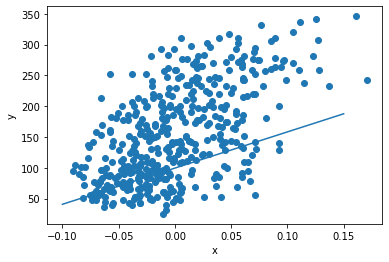

In [41]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

In [42]:
for i in range(1, 100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w += w_rate * err
    b += err
print(w, b)

913.5973364345905 123.39414383177204


Text(0, 0.5, 'y')

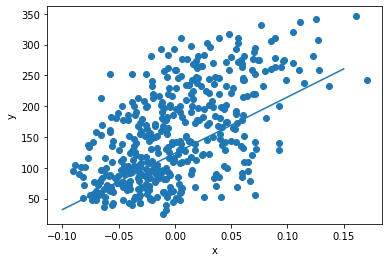

In [43]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')

In [44]:
# 6. 이제 예측하자
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


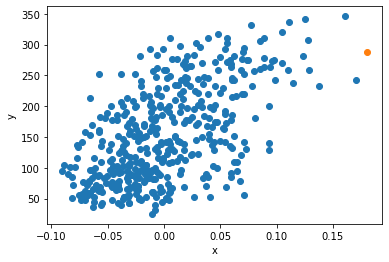

In [51]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#03-4. 선형회귀를 위한 뉴런

Gradient Descent 는 어떤 손실함수(loss function)이 정의되었을 때 손실함수의 값이 최소가 되는 지점을 찾아가는 방법.

In [66]:
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

In [67]:
neuron = Neuron()
neuron.fit(x, y)

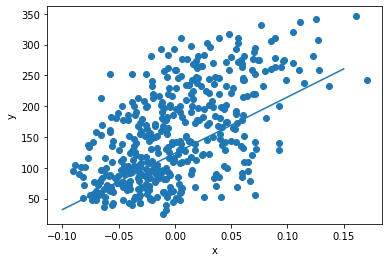

In [68]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 04. Logistic Regression

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [70]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


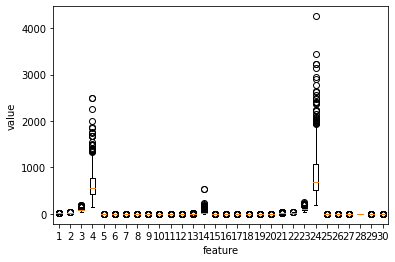

In [71]:
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [72]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [73]:
import numpy as np

np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [74]:
x = cancer.data
y = cancer.target

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

* stratify = y
stratify는 train data 를 나눌때 class 비율을 동일하게 만든다.
train_test_split()함수는 기본적으로 데이터를 나누기 전에 섞지만, 일부 클래스 비율이 불균형한 경우엔 stratify=y 옵션을 주어야 한다.

* test_size = 0.2
기본적으로 train_test_split()함수는 Train dataset을 75:25 비율로 나눈다. test_size 매개변수 옵션을 주면 비율 조절이 가능하다. 0.2는 Dataset의 20%를 테스트셋으로 나누기 위함

* random_state = 42
train_test_split() 은 Dataset을 섞은 다음 나눈다. 섞은 다음 나눈 결과가 항상 일정하도록 난수 초기값을 random_state에 42로 설정해둔 것.

In [76]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [77]:
np.unique(y_train, return_counts = True)

(array([0, 1]), array([170, 285]))

In [79]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    # parameter 초기화
    self.w = np.ones(x.shape[1])
    self.b = 0

    # train 
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activations(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  
  def activations(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activations(np.array(z))
    return a > 0.5

In [80]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


In [81]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp


0.8245614035087719

In [94]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexs = np.random.permutation(np.arange(len(x)))
      for i in indexs:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [95]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in exp


0.9298245614035088

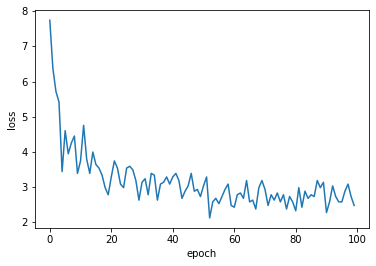

In [96]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [98]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

* tol
반복할때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되지 않으면, 반복 중단
=> 모델의 loss 가 최적값으로 수렴할 정도로 충분한 반복 횟수 입력했는가?

In [99]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [100]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [101]:
print(y_test[0:10])

[0 1 0 1 0 1 1 0 0 0]
